<h1> Imports </h1>

In [ ]:
# Install fastai
#!pip3 install fastai
#pip install azure-storage-blob
#!pip3 install torchvision
#!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
#!pip3 install torchvision
#!pip install pytorch


In [6]:
# This file contains all the main external libs we'll use
from fastai.vision.all import *
import os
from azure.storage.blob import BlobServiceClient,ContainerClient, BlobClient
import datetime
import shutil
import numpy as np

In [ ]:
#!pip install torch===1.7.1+cu110 torchvision===0.8.2+cu110 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html --user

In [14]:
import torch 

In [15]:
from numba import cuda


In [16]:
device = torch.device("cuda")

In [17]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3070 Laptop GPU'

In [18]:
torch.cuda.set_device(0)

In [ ]:
shutil.rmtree("Mais")

In [3]:
# Retrieve the connection string for use with the application. The storage
# connection string is stored in an environment variable on the machine
# running the application called AZURE_STORAGE_CONNECTION_STRING. If the environment variable is
# created after the application is launched in a console or with Visual Studio,
# the shell or application needs to be closed and reloaded to take the
# environment variable into account.
connect_str = os.getenv('DefaultEndpointsProtocol=https;AccountName=storagemainfotosplanten;AccountKey=YHIqjHCcXi8IO3DabS+N1lRzrBoltBaDDofu9vJmMo2tMQghoHMQ8fKT/GXVD0Q569EW8pfuJVqv7CjVkPreVA==;EndpointSuffix=core.windows.net')

In [3]:
import os
from azure.storage.blob import BlobServiceClient, BlobClient
from azure.storage.blob import ContentSettings, ContainerClient
MY_CONNECTION_STRING = "DefaultEndpointsProtocol=https;AccountName=storagemainfotosplanten;AccountKey=YHIqjHCcXi8IO3DabS+N1lRzrBoltBaDDofu9vJmMo2tMQghoHMQ8fKT/GXVD0Q569EW8pfuJVqv7CjVkPreVA==;EndpointSuffix=core.windows.net"
blob_service_client = BlobServiceClient.from_connection_string(MY_CONNECTION_STRING)

all_containers = blob_service_client.list_containers(include_metadata=True)
for container in all_containers:
    if "week" in container['name']:
        print(container['name'])

mais-week-1
mais-week-2
mais-week-3
mais-week-4
mais-week-5
mais-week-6


In [ ]:
searchterms = ["groeistadia","week"]
# download_blobs.py
# Python program to bulk download blob files from azure storage
# Uses latest python SDK() for Azure blob storage
# Requires python 3.6 or above
import os
from azure.storage.blob import BlobServiceClient, BlobClient
from azure.storage.blob import ContentSettings, ContainerClient
if os.path.exists("Plant") and os.path.isdir("Plant"):
  shutil.rmtree("Plant")
os.mkdir("Plant") 

# IMPORTANT: Replace connection string with your storage account connection string
# Usually starts with DefaultEndpointsProtocol=https;...
MY_CONNECTION_STRING = "DefaultEndpointsProtocol=https;AccountName=storagemainfotosplanten;AccountKey=YHIqjHCcXi8IO3DabS+N1lRzrBoltBaDDofu9vJmMo2tMQghoHMQ8fKT/GXVD0Q569EW8pfuJVqv7CjVkPreVA==;EndpointSuffix=core.windows.net"
blob_service_client = BlobServiceClient.from_connection_string(MY_CONNECTION_STRING)

all_containers = blob_service_client.list_containers(include_metadata=True)
for container in all_containers:
  for searchterm in searchterms:
    if searchterm in container['name']:
        print(container['name'])
        # Replace with blob container
        MY_BLOB_CONTAINER = container['name']
        path = "Plant/" + container['name']
        if os.path.exists(path) and os.path.isdir(path):
          shutil.rmtree(path)
        os.mkdir(path)
        # Replace with the local folder where you want files to be downloaded
        LOCAL_BLOB_PATH = path
        
        class AzureBlobFileDownloader:
          def __init__(self):
            print("Intializing AzureBlobFileDownloader")
        
            # Initialize the connection to Azure storage account
            self.blob_service_client =  BlobServiceClient.from_connection_string(MY_CONNECTION_STRING)
            self.my_container = self.blob_service_client.get_container_client(MY_BLOB_CONTAINER)
        
        
          def save_blob(self,file_name,file_content):
            # Get full path to the file
            download_file_path = os.path.join(LOCAL_BLOB_PATH, file_name)
        
            # for nested blobs, create local path as well!
            os.makedirs(os.path.dirname(download_file_path), exist_ok=True)
        
            with open(download_file_path, "wb") as file:
              file.write(file_content)
        
          def download_all_blobs_in_container(self):
            my_blobs = self.my_container.list_blobs()
            for blob in my_blobs:
              print(blob.name)
              bytes = self.my_container.get_blob_client(blob).download_blob().readall()
              self.save_blob(blob.name, bytes)
        
        # Initialize class and upload files
        azure_blob_file_downloader = AzureBlobFileDownloader()
        azure_blob_file_downloader.download_all_blobs_in_container()

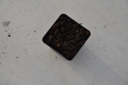

In [18]:
from PIL import Image
path = 'Plant/'
im = Image.open(path + 'mais-week-1/Pw1 (1).JPG')
im.to_thumb(128,128)

In [10]:
from fastai.vision.all import *
filenames = get_image_files(path)
filenames

(#5056) [Path('Plant/fles-week1/IMG_20220126_094804_001.jpg'),Path('Plant/fles-week1/IMG_20220126_094804_002.jpg'),Path('Plant/fles-week1/IMG_20220126_094804_003.jpg'),Path('Plant/fles-week1/IMG_20220126_094804_004.jpg'),Path('Plant/fles-week1/IMG_20220126_094804_005.jpg'),Path('Plant/fles-week1/IMG_20220126_094804_006.jpg'),Path('Plant/fles-week1/IMG_20220126_094804_007.jpg'),Path('Plant/fles-week1/IMG_20220126_094804_008.jpg'),Path('Plant/fles-week1/IMG_20220126_094804_009.jpg'),Path('Plant/fles-week1/IMG_20220126_094804_010.jpg')...]

In [11]:
failed = verify_images(filenames)
failed

(#0) []

In [20]:
Mais = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)


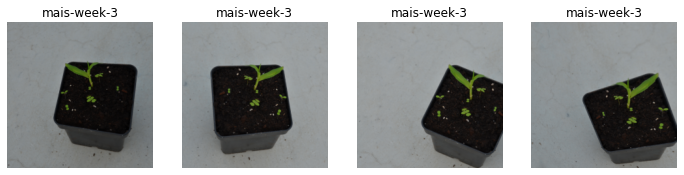

In [21]:
#Mais = Mais.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = Mais.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [6]:
model_OneCycle = cnn_learner(dls, resnet34, metrics=error_rate)
model_OneCycle.fit_one_cycle(3, 3e-3)

In [7]:
model_OneCycle.unfreeze()

SuggestedLRs(valley=0.00015848931798245758)

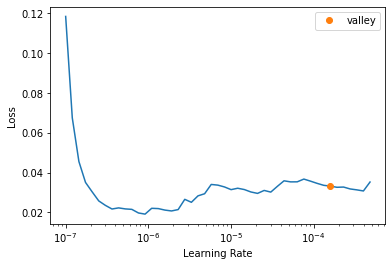

In [8]:
model_OneCycle.lr_find()

In [9]:
model_OneCycle.fit_one_cycle(6, lr_max=1e-5)

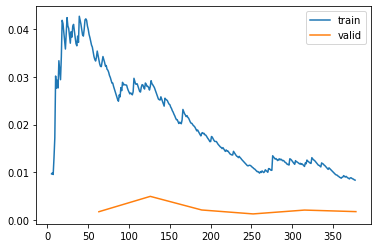

In [10]:
model_OneCycle.recorder.plot_loss()

In [11]:
# saving our model, by default in a folder called 'models'.
model_OneCycle.save('Mix_Model_Plant_Fles')
#creating an serialized pickle object of our model, the export.pkl file
model_OneCycle.export()

In [24]:
from fastai.callback.fp16 import *
model_Resnet152 = cnn_learner(dls, resnet152, metrics=error_rate).to_fp16()
model_Resnet152.fit_one_cycle(3, 3e-3)
model_Resnet152.unfreeze()
model_Resnet152.fit_one_cycle(5, lr_max=slice(1e-6,1e-4))

C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


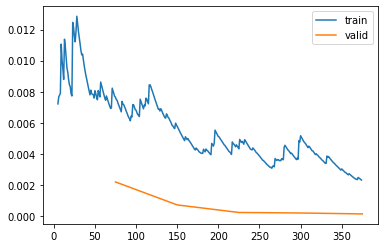

In [27]:
model_Resnet152.recorder.plot_loss()

In [28]:
model_Resnet152 = model_Resnet152.to_fp32()
# saving our model, by default in a folder called 'models'.
model_Resnet152.save('Mix_Model_152')
#creating an serialized pickle object of our model, the export.pkl file

model_Resnet152.export()

In [ ]:
from fastai.callback.fp16 import *
model_freeze_Resnet50 = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
model_freeze_Resnet50.fine_tune(6, freeze_epochs=3)

In [ ]:
model_freeze_Resnet50.recorder.plot_loss()

In [ ]:
interp = ClassificationInterpretation.from_learner(model_freeze_Resnet50)
interp.plot_confusion_matrix()

In [ ]:
# saving our model, by default in a folder called 'models'.
model_freeze_Resnet50.save('Model Plant')
#creating an serialized pickle object of our model, the export.pkl file
model_freeze_Resnet50.export()

In [22]:
model_Resnet50 = cnn_learner(dls, resnet50, metrics=error_rate)
model_Resnet50.fine_tune(4)

In [ ]:
model_Resnet50.recorder.plot_loss()

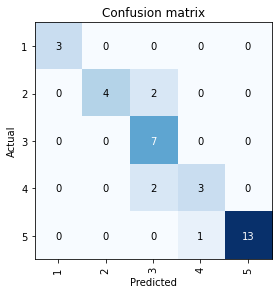

In [23]:
interp = ClassificationInterpretation.from_learner(model_Resnet50)
interp.plot_confusion_matrix()

In [24]:
interp = ClassificationInterpretation.from_learner(model_Resnet50)

def plot_top_losses_fix( interp, k, largest=True, **kwargs):
        losses,idx = interp.top_losses(k, largest)
        if not isinstance(interp.inputs, tuple): interp.inputs = (interp.inputs,)
        if isinstance(interp.inputs[0], Tensor): inps = tuple(o[idx] for o in interp.inputs)
        else: inps = interp.dl.create_batch(interp.dl.before_batch([tuple(o[i] for o in interp.inputs) for i in idx]))
        b = inps + tuple(o[idx] for o in (interp.targs if is_listy(interp.targs) else (interp.targs,)))
        x,y,its = interp.dl._pre_show_batch(b, max_n=k)
        b_out = inps + tuple(o[idx] for o in (interp.decoded if is_listy(interp.decoded) else (interp.decoded,)))
        x1,y1,outs = interp.dl._pre_show_batch(b_out, max_n=k)
        if its is not None:
            #plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), L(self.preds).itemgot(idx), losses,  **kwargs)
            plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), interp.preds[idx], losses,  **kwargs)
        #TODO: figure out if this is needed
        #its None means that a batch knows how to show itself as a whole, so we pass x, x1
        #else: show_results(x, x1, its, ctxs=ctxs, max_n=max_n, **kwargs)



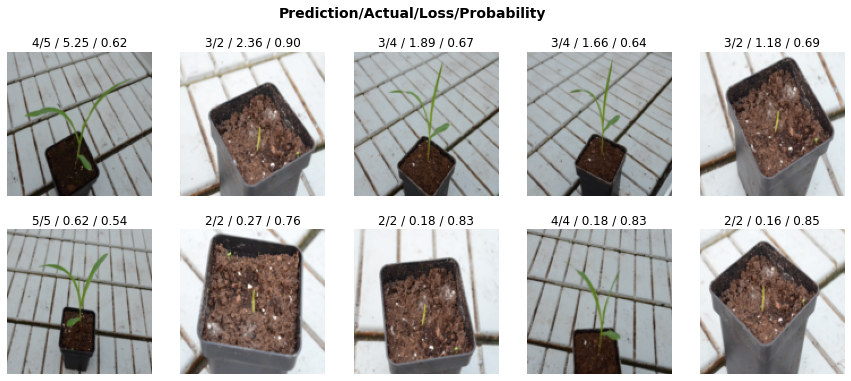

In [25]:
plot_top_losses_fix(interp, 10, nrows=2)

In [ ]:
# saving our model, by default in a folder called 'models'.
model_Resnet50.save('API model')
#creating an serialized pickle object of our model, the export.pkl file
model_Resnet50.export()

In [12]:
import pathlib
platform.system()


'Windows'

In [1]:
import flask
from flask import request, jsonify
import requests

In [4]:
resnet_really_adv = load_learner('export.pkl')
response = requests.get("https://www.mooiemoestuin.nl/wp-content/uploads/Mais-zaailingen-1-1024x769.jpg")

(resnet_really_adv.predict(response.content))


('mais-week-3',
 tensor(3),
 tensor([1.6746e-02, 1.8056e-04, 1.9116e-04, 4.4959e-01, 3.0613e-01, 2.2682e-01,
         3.3901e-04]))

In [9]:
app = flask.Flask(__name__)
our_out_of_the_box_model_inference = load_learner('export.pkl')
# let's test our model on an image
#our_out_of_the_box_model_inference = load_learner('models\first_model.pth')

#app.config["DEBUG"] = True

@app.route('/', methods=['GET'])
def home():
    if request.method == 'GET':
        link = request.args.get('link')
        response = requests.get(link)
        stringwaardepred = str(max(our_out_of_the_box_model_inference.predict(response.content)[2]))
# Create some test data for our catalog in the form of a list of dictionaries.
        Output = {'output': our_out_of_the_box_model_inference.predict(response.content)[0],
        'accuracy': float(stringwaardepred[11:-1])*100
        }


    return jsonify(Output)
app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2022-01-28 08:56:58,125] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\flask\app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\flask\app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\flask\app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\thoma\AppData\Local\Temp/ipykernel_31396/3355510450.py", line 12, in home
    response = requests.get(link)
  File "C:\Users

127.0.0.1 - - [28/Jan/2022 08:57:02] "GET /?link=https://www.entraid.com/wp-content/uploads/2016/03/Jeunes-plants-de-mais-700x389.jpg HTTP/1.1" 200 -
[2022-01-28 09:03:45,019] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\flask\app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\flask\app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\flask\app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\thoma\AppData\Local\Temp/ipykernel

127.0.0.1 - - [28/Jan/2022 09:04:07] "GET /?link=https://www.entraid.com/wp-content/uploads/2016/03/Jeunes-plants-de-mais-700x389.jpg HTTP/1.1" 200 -


127.0.0.1 - - [28/Jan/2022 09:04:14] "GET /?link=https://www.mooiemoestuin.nl/wp-content/uploads/Mais-zaailingen-1-1024x769.jpg HTTP/1.1" 200 -
[2022-01-28 09:04:33,429] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\flask\app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\flask\app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\thoma\AppData\Local\Programs\Python\Python38\lib\site-packages\flask\app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\thoma\AppData\Local\Temp/ipykernel_31396